## BAGIAN 1 QUERY SQL

1. QUERY SQL UNTUK MENAMPILKAN KOLOM "tahun" DAN "Total_economic_damage"


```
SELECT tahun, Total_economic_damage
FROM report;
```

gambar dibawah merupakan contoh hasil output dari query di atas

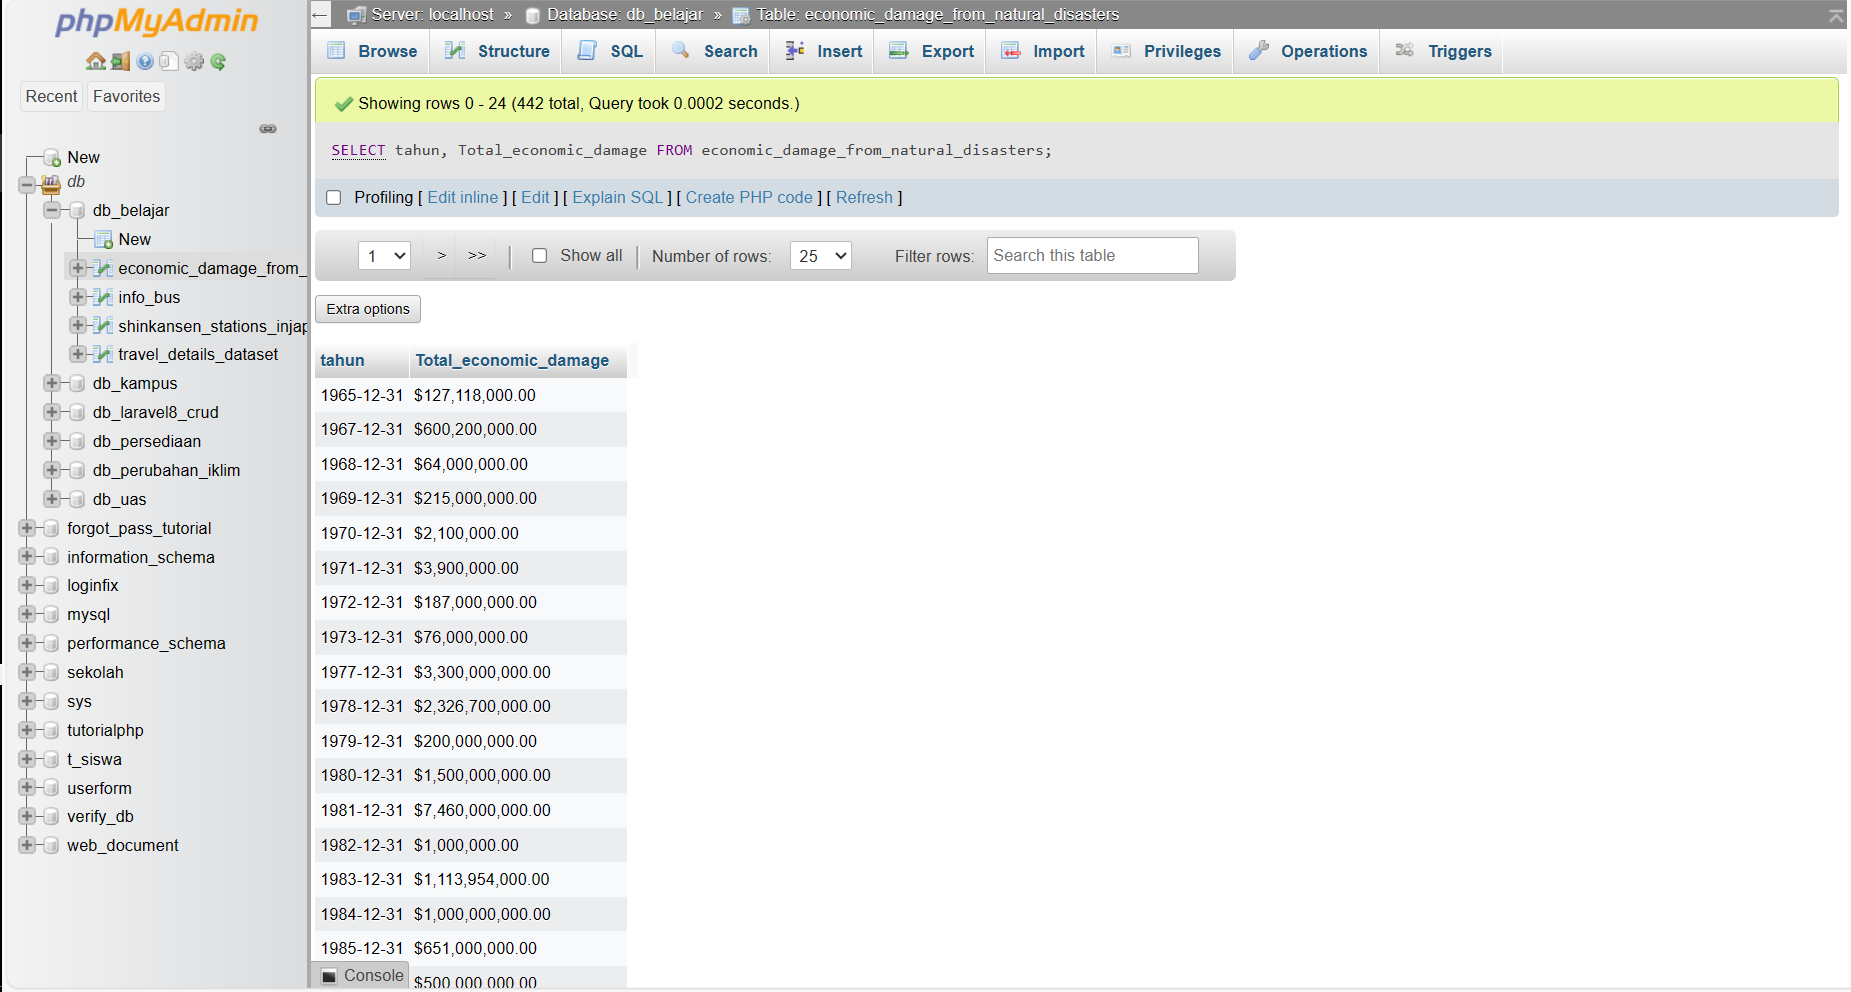

2. QUERY SQL UNTUK MENAMPILKAN KOLOM "tahun" DAN "reported_natural_disasters"


```
SELECT tahun, reported_natural_disasters FROM report;
```



gambar dibawah merupakan contoh hasil output dari query di atas

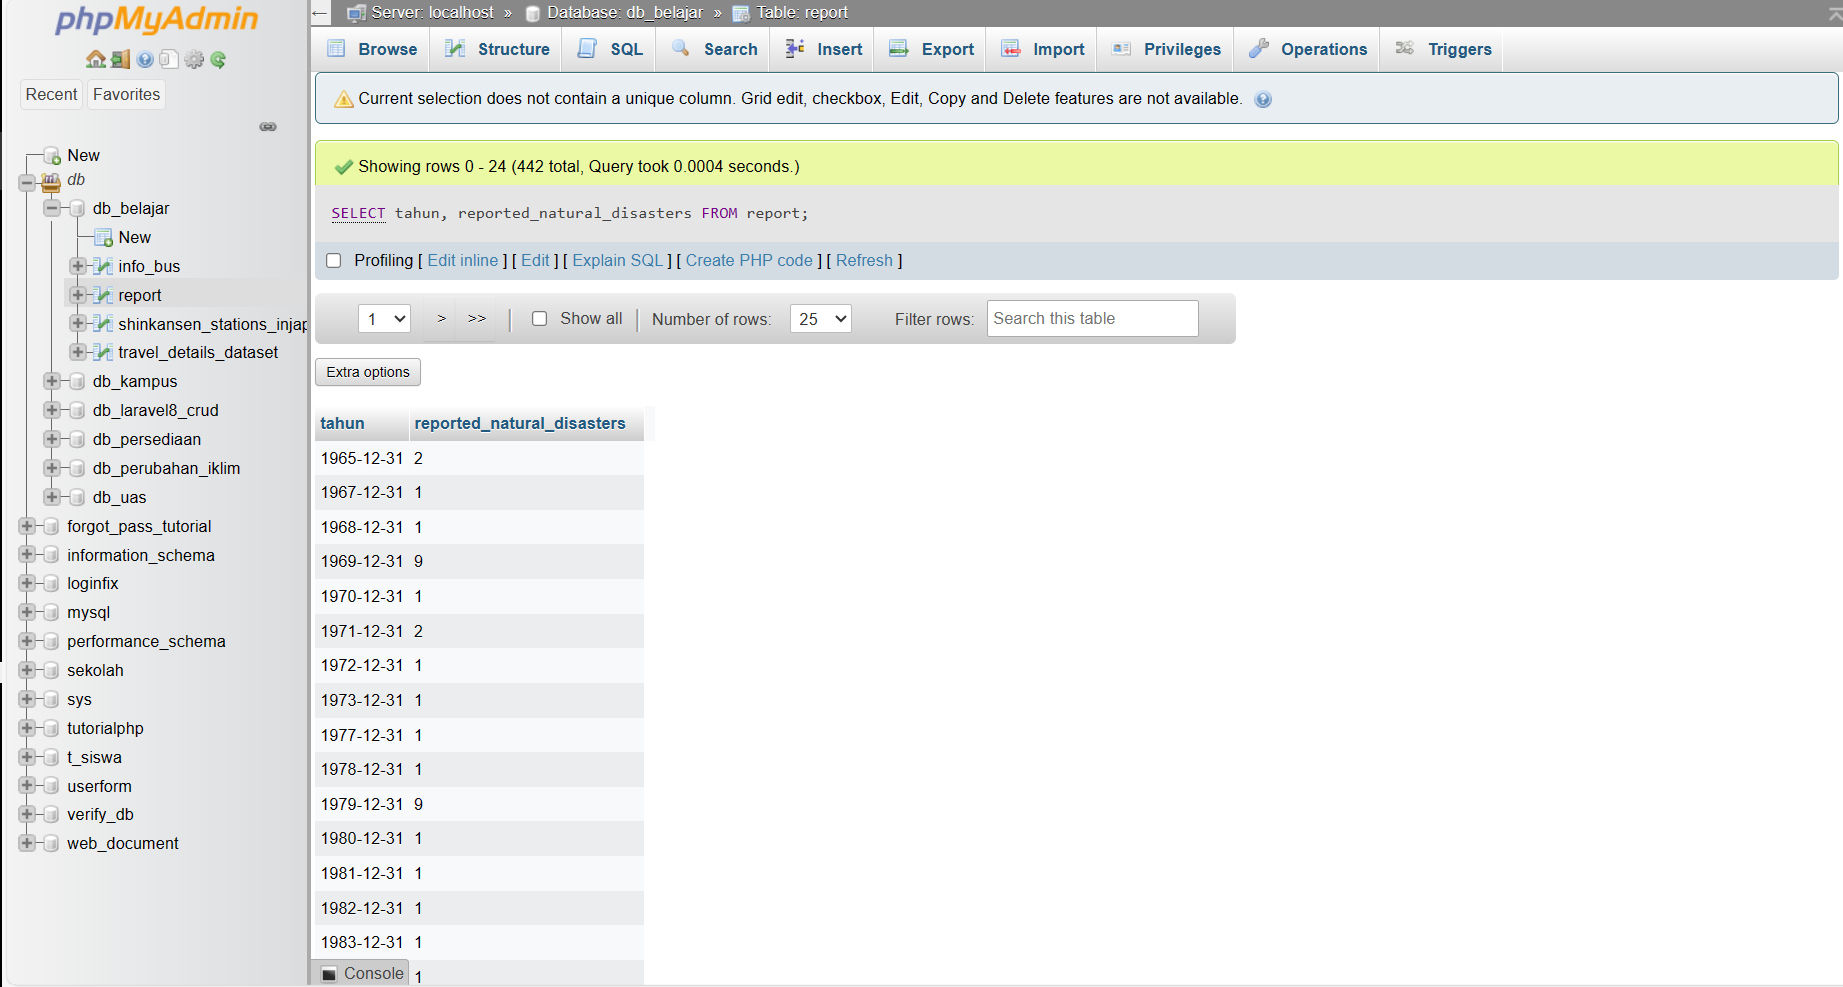

3. QUERY SQL UNTUK MENAMPILKAN total bencana alam dan kerusakan alam untuk setiap jenis bencana berdasarkan rangkaian tahun


```
SELECT tahun, Entity, COUNT(*) AS reported_natural_disasters, SUM(Total_economic_damage) AS total_kerusakan_ekonomi FROM report GROUP BY reported_natural_disasters ORDER BY reported_natural_disasters DESC;
```



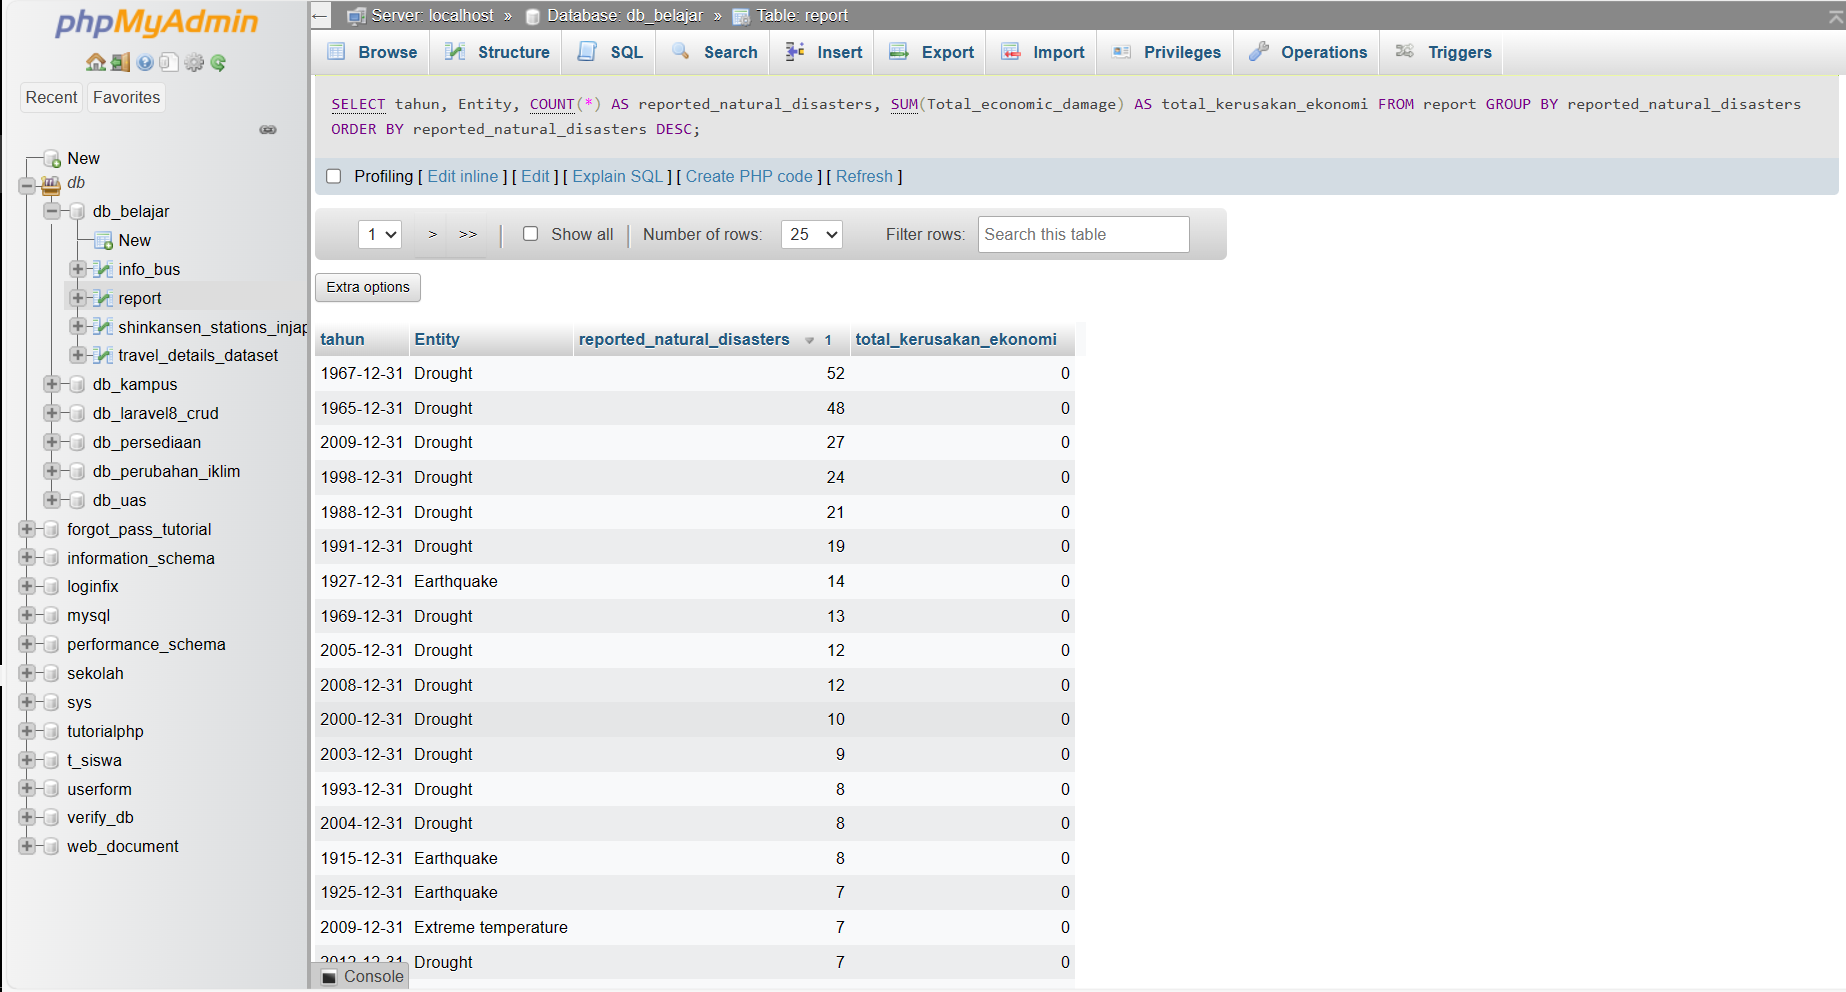

4. QUERY SQL UNTUK MERANGKUM DATA PER 10 TAHUN , MENGHITUNG RATA-RATA DAN JUMLAH BENCANA ALAM SERTA KERUSAKAN EKONOMINYA


```
SELECT DATE_FORMAT('year', tahun) / 10 * 10 AS dekade, AVG(reported_disasters) AS rata_rata_bencana, SUM(Total_economic_damage) AS total_kerusakan_ekonomi FROM report GROUP BY dekade ORDER BY dekade;
```




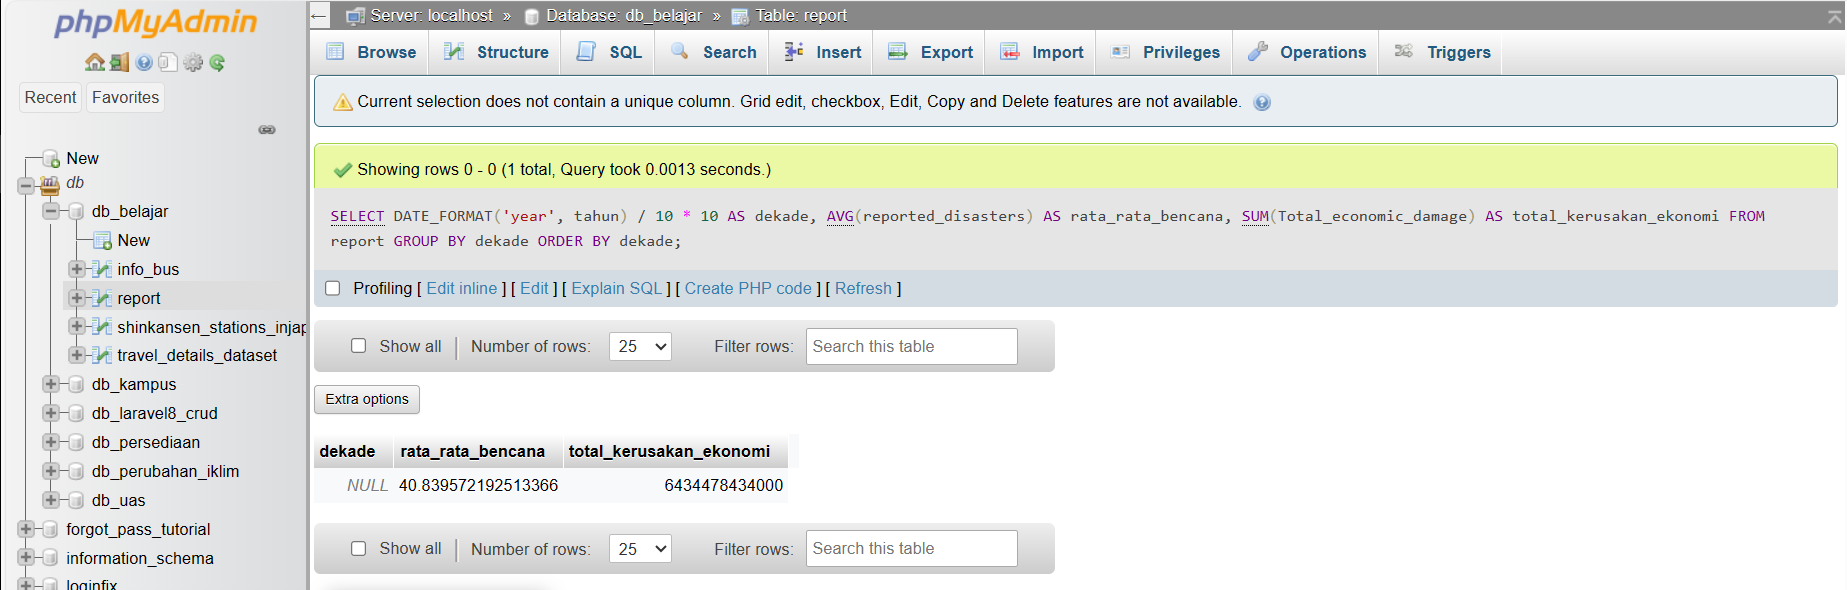

## BAGIAN 2 ILMU DATA DAN ANALISIS STATISTIK

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("/content/drive/MyDrive/dataset/Report natural disaster.csv")
data.head()

,Entity,Year1,moday,Total economic damage from natural disasters (US$),Number of reported natural disasters (reported disasters),Year
0,All natural disasters,12/31/1900,-43,30000000.0,5,1900-12-31
1,All natural disasters,12/31/1901,-43,0.0,2,1901-12-31
2,All natural disasters,12/31/1902,-43,0.0,9,1902-12-31
3,All natural disasters,12/31/1903,-43,480000000.0,8,1903-12-31
4,All natural disasters,12/31/1904,-43,0.0,2,1904-12-31


In [16]:
data = data.drop(["Year1","moday"], axis=1)
data = data[data['Entity'] != 'All natural disasters']

In [17]:
# Statistik deskriptif untuk kolom "Total economic damage from natural disasters (US$)"
desc_total_damage = data['Total economic damage from natural disasters (US$)'].describe()

# Statistik deskriptif untuk kolom "Number of reported natural disasters (reported disasters)"
desc_reported_disasters = data['Number of reported natural disasters (reported disasters)'].describe()

# Menampilkan statistik deskriptif
print("Statistik Deskriptif Total Economic Damage:")
print(desc_total_damage)

print("\nStatistik Deskriptif Number of Reported Disasters:")
print(desc_reported_disasters)

Statistik Deskriptif Total Economic Damage:
count    4.420000e+02
mean     7.278822e+09
std      2.006170e+10
min      0.000000e+00
25%      7.120000e+07
50%      7.780130e+08
75%      4.191665e+09
max      2.303000e+11
Name: Total economic damage from natural disasters (US$), dtype: float64

Statistik Deskriptif Number of Reported Disasters:
count    442.000000
mean      21.943439
std       31.647921
min        1.000000
25%        3.000000
50%        9.000000
75%       25.000000
max      193.000000
Name: Number of reported natural disasters (reported disasters), dtype: float64


In [18]:
import scipy.stats as stats
# pengujian hipotesis untuk menguji apakah rata-rata Total economic damage sama dengan 0
t_stat, p_value = stats.ttest_1samp(data['Total economic damage from natural disasters (US$)'], 0)
if p_value < 0.05:
    print("Terdapat bukti yang cukup untuk menyatakan bahwa rata-rata Total economic damage tidak sama dengan 0.")
else:
    print("Tidak ada bukti yang cukup untuk menyatakan bahwa rata-rata Total economic damage tidak sama dengan 0.")

# Contoh regresi sederhana untuk menilai hubungan antara Total economic damage dan Number of reported disasters
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Number of reported natural disasters (reported disasters)'],
                                                             data['Total economic damage from natural disasters (US$)'])
if p_value < 0.05:
    print(f"Hubungan antara Number of reported disasters dan Total economic damage signifikan (p-value: {p_value}).")
else:
    print("Tidak ada hubungan yang signifikan antara Number of reported disasters dan Total economic damage.")

Terdapat bukti yang cukup untuk menyatakan bahwa rata-rata Total economic damage tidak sama dengan 0.
Tidak ada hubungan yang signifikan antara Number of reported disasters dan Total economic damage.


In [19]:
summary_stats = data[['Total economic damage from natural disasters (US$)', 'Number of reported natural disasters (reported disasters)']].describe()
print(summary_stats)


       Total economic damage from natural disasters (US$)  \
count                                       4.420000e+02    
mean                                        7.278822e+09    
std                                         2.006170e+10    
min                                         0.000000e+00    
25%                                         7.120000e+07    
50%                                         7.780130e+08    
75%                                         4.191665e+09    
max                                         2.303000e+11    

       Number of reported natural disasters (reported disasters)  
count                                         442.000000          
mean                                           21.943439          
std                                            31.647921          
min                                             1.000000          
25%                                             3.000000          
50%                                             

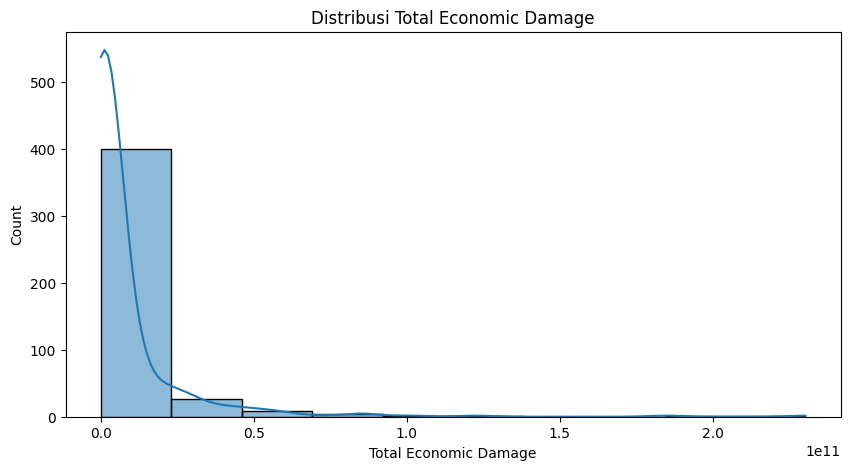

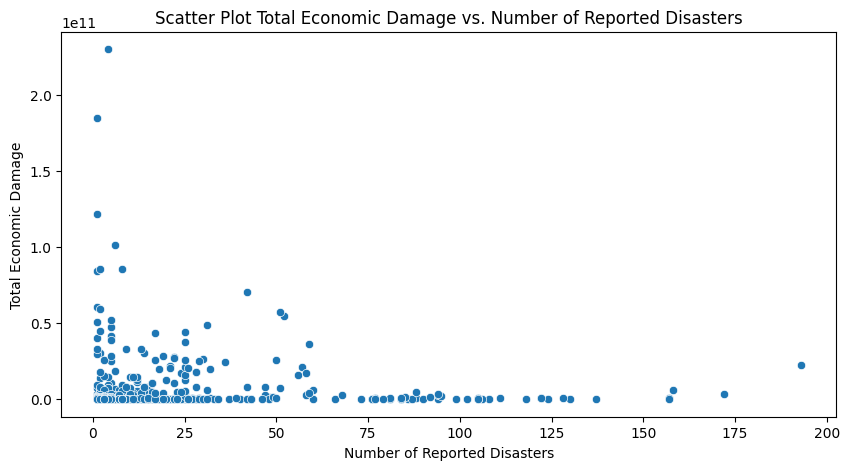

In [20]:
import seaborn as sns

# Histogram Total economic damage
plt.figure(figsize=(10, 5))
sns.histplot(data['Total economic damage from natural disasters (US$)'], bins=10, kde=True)
plt.title('Distribusi Total Economic Damage')
plt.xlabel('Total Economic Damage')
plt.show()

# Scatter plot Total economic damage vs. Number of reported disasters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Number of reported natural disasters (reported disasters)', y='Total economic damage from natural disasters (US$)')
plt.title('Scatter Plot Total Economic Damage vs. Number of Reported Disasters')
plt.xlabel('Number of Reported Disasters')
plt.ylabel('Total Economic Damage')
plt.show()

In [21]:
correlation = data[['Total economic damage from natural disasters (US$)', 'Number of reported natural disasters (reported disasters)']].corr()
print(correlation)

                                                    Total economic damage from natural disasters (US$)  \
Total economic damage from natural disasters (US$)                                           1.000000    
Number of reported natural disasters (reported ...                                          -0.065138    

                                                    Number of reported natural disasters (reported disasters)  
Total economic damage from natural disasters (US$)                                          -0.065138          
Number of reported natural disasters (reported ...                                           1.000000          


In [22]:
categorical_distribution = data['Entity'].value_counts()
print(categorical_distribution)

Extreme weather        94
Earthquake             83
Flood                  69
Drought                49
Wildfire               44
Extreme temperature    34
Landslide              34
Volcanic activity      29
Mass movement (dry)     5
Impact                  1
Name: Entity, dtype: int64


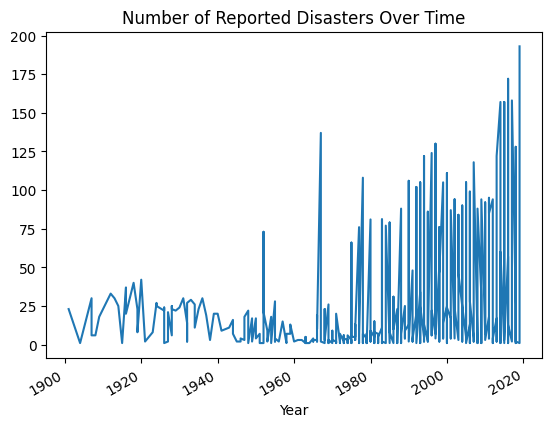

In [23]:
data['Year'] = pd.to_datetime(data['Year'])
time_series = data.set_index('Year')
time_series['Number of reported natural disasters (reported disasters)'].plot(title='Number of Reported Disasters Over Time')
plt.show()

Pemodelan statistika dengan regresi linear

In [25]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linier
model = LinearRegression()
X = data[['Number of reported natural disasters (reported disasters)']]
y = data['Total economic damage from natural disasters (US$)']
model.fit(X, y)

# Mencetak parameter model
print(f'Koefisien (slope): {model.coef_[0]}')
print(f'Intersep (intercept): {model.intercept_}')

Koefisien (slope): -41290891.272019856
Intersep (intercept): 8184886586.984888


In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model eksponensial smoothing
model = ExponentialSmoothing(time_series['Number of reported natural disasters (reported disasters)'], seasonal='add', seasonal_periods=10)
results = model.fit()

# Mencetak ringkasan model
print(results.summary())

                                          ExponentialSmoothing Model Results                                         
Dep. Variable:     Number of reported natural disasters (reported disasters)   No. Observations:                  442
Model:                                                  ExponentialSmoothing   SSE                          45494.415
Optimized:                                                              True   AIC                           2072.243
Trend:                                                                  None   BIC                           2121.339
Seasonal:                                                           Additive   AICC                          2073.227
Seasonal Periods:                                                         10   Date:                 Fri, 03 Nov 2023
Box-Cox:                                                               False   Time:                         13:06:14
Box-Cox Coeff.:                                         

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
from scipy.stats import f_oneway

# Contoh uji ANOVA
grouped_data = [data[data['Entity'] == entity]['Number of reported natural disasters (reported disasters)'] for entity in data['Entity'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)
if p_value < 0.05:
    print("Ada perbedaan signifikan antara kelompok-kelompok.")
else:
    print("Tidak ada perbedaan signifikan antara kelompok-kelompok.")

Ada perbedaan signifikan antara kelompok-kelompok.


## BAGIAN 3 PENGEMBANGAN PRODUK BERUPA DASHBOARD INTERAKTIF

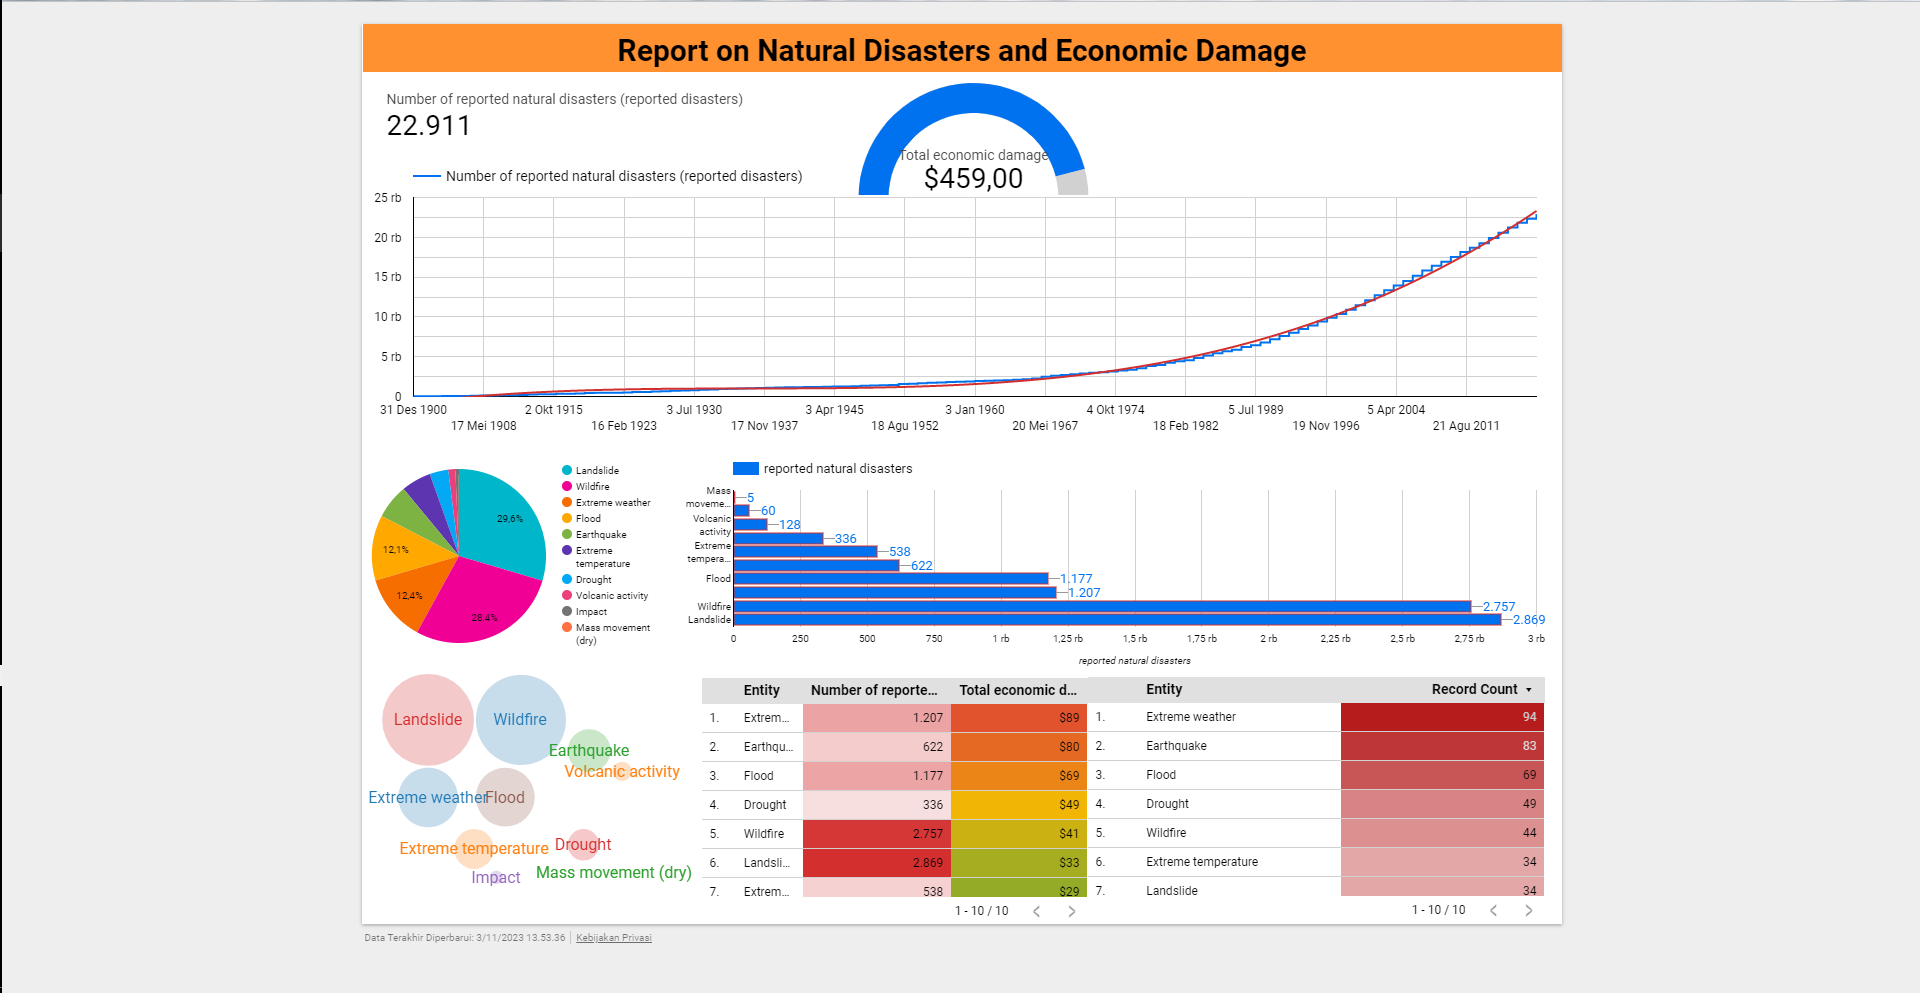

link dashboard : https://lookerstudio.google.com/reporting/014bc9c6-0d37-4d70-93a1-bb7fc6eeefdc

## BAGIAN 4 DAMPAK DENGAN ILMU DATA

Report natural disasters, sebuah kumpulan laporan tentang bencana alam yang mencapai 22.911 kejadian dari tahun 1900 hingga 2018, adalah sebuah bukti nyata tentang dampak perubahan iklim yang signifikan. Dalam laporan ini, kita akan menjelaskan sejauh mana dampak bencana alam terhadap perubahan sosial dan strategi potensial untuk mitigasi dan adaptasi.

Dampak Bencana Alam dan Perubahan Sosial:

Bencana alam memiliki dampak yang luas terhadap masyarakat, yang meliputi kerugian ekonomi, kerusakan infrastruktur, kehilangan nyawa, dan perubahan perilaku serta tata ruang sosial. Salah satu dampak yang paling mencolok adalah kerugian ekonomi yang tinggi. Dalam periode 1900 hingga 2018, total kerusakan ekonomi akibat bencana alam mencapai lebih dari 459 juta dolar. Hal ini tidak hanya berdampak pada individu dan komunitas, tetapi juga pada perekonomian nasional dan global.

Selain kerugian ekonomi, bencana alam sering kali mengakibatkan perubahan sosial yang signifikan. Misalnya, bencana alam dapat mengakibatkan migrasi paksa, perubahan pola penggunaan lahan, dan ketidakpastian keamanan pangan. Dalam beberapa kasus, bencana alam dapat memicu konflik sosial dan politik yang lebih besar. Dampak ini secara langsung mempengaruhi kualitas hidup masyarakat yang terkena dampak.

Strategi Mitigasi:

Salah satu strategi potensial untuk mengurangi dampak bencana alam adalah mitigasi. Mitigasi adalah serangkaian tindakan yang dirancang untuk mengurangi risiko bencana dan kerugian yang mungkin terjadi. Beberapa strategi mitigasi yang dapat diterapkan adalah sebagai berikut:

1. Pemantauan dan Peringatan Dini: Membangun sistem pemantauan bencana yang kuat dan peringatan dini yang dapat memberikan informasi real-time kepada masyarakat dan pemangku kepentingan untuk menghindari bencana.

2. Pengelolaan Risiko Bencana: Mengidentifikasi daerah yang rentan terhadap bencana dan mengambil langkah-langkah untuk mengurangi risiko, seperti memperkuat bangunan dan infrastruktur penting.

3. Pendidikan dan Kesadaran Masyarakat: Meningkatkan kesadaran masyarakat tentang risiko bencana dan bagaimana menghadapinya, serta memberikan pelatihan dan pendidikan kepada masyarakat.

4. Pengurangan Emisi Gas Rumah Kaca: Mengurangi emisi gas rumah kaca yang menyebabkan perubahan iklim adalah langkah penting dalam mengurangi frekuensi dan intensitas bencana alam jangka panjang.

Strategi Adaptasi:

Selain mitigasi, strategi adaptasi juga diperlukan untuk mengatasi dampak bencana alam yang tidak dapat dihindari. Adaptasi adalah langkah-langkah yang dirancang untuk membantu masyarakat dan sistem sosial beradaptasi dengan perubahan iklim. Beberapa strategi adaptasi yang dapat diterapkan adalah sebagai berikut:

1. Diversifikasi Mata Pencaharian: Masyarakat harus diversifikasi mata pencaharian mereka sehingga mereka tidak hanya mengandalkan satu sumber pendapatan yang rentan terhadap bencana alam.

2. Pembangunan Infrastruktur Tahan Bencana: Infrastruktur yang dibangun harus tahan terhadap bencana alam, seperti bangunan yang memenuhi standar keamanan dan sistem drainase yang efisien.

3. Pemulihan Ekosistem Alam: Mempulihkan dan memelihara ekosistem alam seperti hutan, lahan basah, dan sungai adalah kunci untuk mengurangi dampak bencana alam.

4. Perencanaan Kota yang Berkelanjutan: Membangun kota yang berkelanjutan dengan mempertimbangkan perubahan iklim dan risiko bencana dapat membantu mengurangi kerugian di masa depan.

Kesimpulan:

Report natural disasters yang mencatat 22.911 kejadian bencana alam sepanjang periode 1900 hingga 2018 adalah bukti nyata dampak perubahan iklim terhadap masyarakat. Dampak ekonomi yang signifikan dan perubahan sosial yang disebabkan oleh bencana alam memerlukan tindakan mitigasi dan adaptasi yang tepat. Strategi mitigasi harus difokuskan pada mengurangi risiko bencana, sementara strategi adaptasi harus membantu masyarakat beradaptasi dengan perubahan yang tidak dapat dihindari. Dengan langkah-langkah yang tepat, kita dapat membantu melindungi masyarakat dan ekosistem kita dari dampak perubahan iklim yang semakin parah.